# Подготовка

In [1]:
#include <iostream>
using namespace std;

In [2]:
inline void swap(int& a, int& b){
    int tmp = a;
    a = b;
    b = tmp;
}

In [3]:
inline int max(int a, int b){
    return a > b ? a : b;
}

In [4]:
inline int min(int a, int b){
    return a < b ? a : b;
}

In [5]:
#define N 10000
#define M 1000
int a[N];

In [6]:
void randomizeA(){
    for(int i=0; i<N; i++)
        a[i] = rand() % M;
}

# Еще немного про сортировку слиянием

Процедуры слияния

С дополнительной памятью, цикл while

In [1]:
void _merge1(int* a, int* b, int* res, int size_a, int size_b) {
    int i = 0, j = 0, k = 0;
    while ((i < size_a) || (j < size_b))
        if((j >= size_b) || ((i < size_a) && (a[i] >= b[j])))
            res[k++] = a[i++];            
        else
            res[k++] = b[j++];
}

С дополнительной памятью, цикл for

In [8]:
void _merge2(int res[], int a[], int b[], int sizeA, int sizeB){
    for(int i = 0, j = 0, k = 0; k < sizeA + sizeB; k++){
        if (i == sizeA) {res[k] = b[j++]; continue;}
        if (j == sizeB) {res[k] = a[i++]; continue;}
        res[k] = (a[i] < b[j] ? a[i++] : b[j++]);
    }
}

С одним дополнительным массивом

In [9]:
void _merge3(int a[], int temp[], int l, int m, int r){
    int i, j;
    //for(i=m+1; i>1; i--) temp[i-1] = a[i-1];
    for(i=m-1; i>=l; i--) temp[i] = a[i];
    //for(j=m; j<r; j++) temp[r+m-j] = a[j+1];
    for(j=m; j<r; j++) temp[r+m-j-1] = a[j];
    //for(int k = l, j = r - 1, i = l; k <= r; k++)
    for(int k = l, j = r - 1, i = l; k < r; k++)
        if(temp[j] < temp[i])
            a[k] = temp[j--];
        else
            a[k] = temp[i++];
}

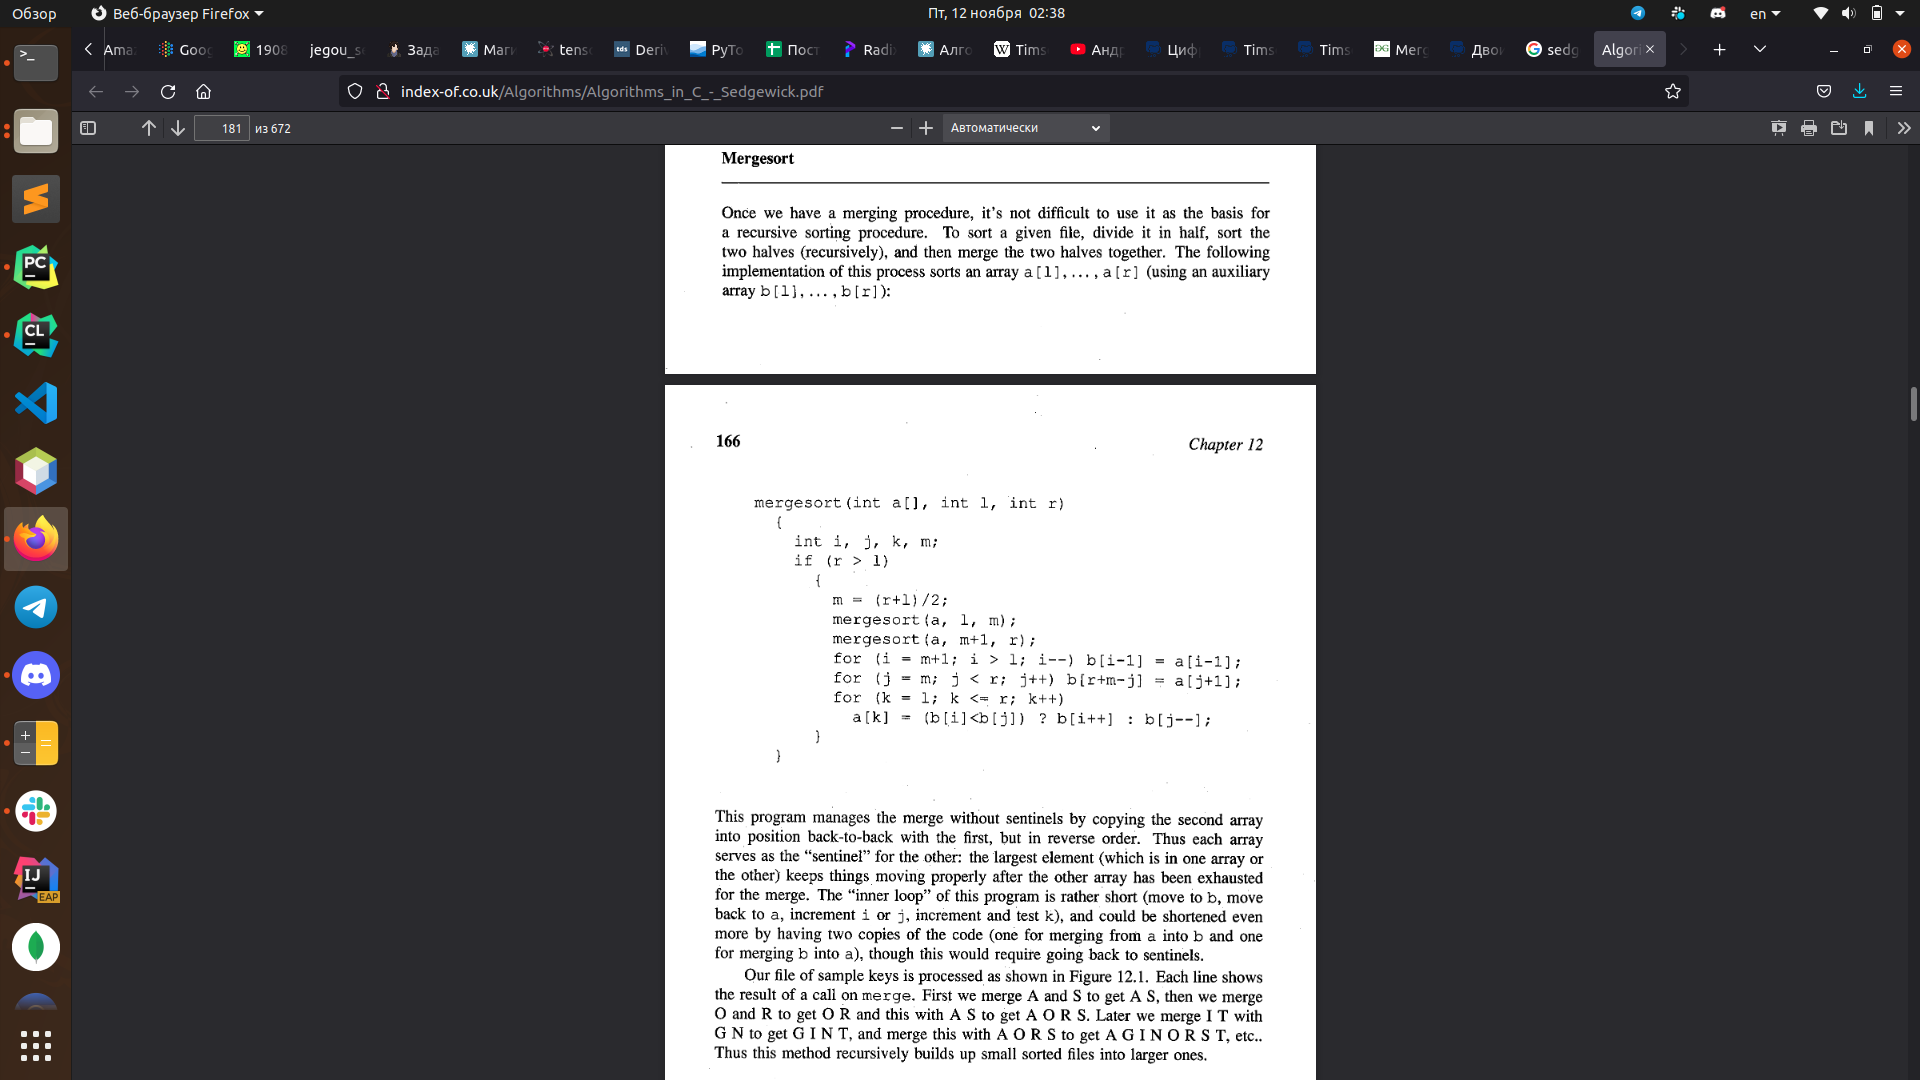

Сортировка нисходящая

In [10]:
void _mergeSort1(int a[], int temp[], int l, int r){
    if(r <= l + 1) return;
    int m = (r + l) / 2;
    _mergeSort1(a, temp, l, m );
    _mergeSort1(a, temp, m, r);
    _merge3(a, temp, l, m, r);
}

In [11]:
void mergeSortDown(int a[], int size){
    int temp[size];
    _mergeSort1(a, temp, 0, size);
}

Сортировка слиянием без копирования

In [12]:
void _mergeSortABr(int a[], int b[], int l, int r){
    if(r <= l + 1) return;
    int m = (r + l) / 2;
    _mergeSortABr(b, a, l, m );
    _mergeSortABr(b, a, m, r);
    _merge2(b+l, b+m, a+l, m-l, r-m);
}

In [13]:
void  _mergeSortAB(int a[], int l, int r){
    int temp[r];
    for (int i=l; i<r; i++) temp[i] = a[i];
    _mergeSortABr(a, temp, l, r);
}

In [14]:
void  mergeSortAB(int a[], int size){
    _mergeSortAB(a, 0, size);
}

Сортировка слиянием восходящая

In [15]:
void _mergeSortUP(int a[], int l, int r){
    int temp[r];
    for(int m=1; m<r; m=m+m)
        for (int i = l; i <= r-m ; i+= m+m) {
            _merge3(a, temp, i, i+m, min(i + m + m, r));

        }
}

In [16]:
void mergeSortUP(int a[], int size){
    _mergeSortUP(a, 0, size);
}

Сортировка слиянием без дополнительной памяти

In [17]:
// модернизированный свап
void _iswap(int* xs, int i, int j) {
    int tmp = xs[i]; xs[i] = xs[j]; xs[j] = tmp;
}

In [18]:
// модернизированное слияние
void _imerge(int* a, int i, int m, int j, int n, int w) {
    while (i < m && j < n)
        _iswap(a, w++, a[i] < a[j] ? i++ : j++);
    while (i < m)
        _iswap(a, w++, i++);
    while (j < n)
        _iswap(a, w++, j++);
}

In [19]:
// заголовок функции
void _imsort(int* a, int l, int r);

In [20]:
// классическое слияние, модернизированное для работы inplace
void _isort(int* a, int l, int r, int w) {
    int m;
    if (r - l > 1) {
        m = l + (r - l) / 2;
        _imsort(a, l, m);
        _imsort(a, m, r);
        _imerge(a, l, m, m, r, w);
    }
    else
        // переброска буферов
        while (l < r)
            _iswap(a, l++, w++);
}

input_line_27:6:9: error: use of undeclared identifier '_imsort'; did you mean '__sort'?
        _imsort(a, l, m);
        ^~~~~~~
        __sort
/home/user/anaconda3/envs/ai_3_7/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/bits/stl_algo.h:1962:5: note: '__sort' declared here
    __sort(_RandomAccessIterator __first, _RandomAccessIterator __last,
    ^
input_line_27:6:9: error: no matching function for call to '__sort'
        _imsort(a, l, m);
        ^~~~~~~
/home/user/anaconda3/envs/ai_3_7/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../../../../x86_64-conda-linux-gnu/include/c++/9.3.0/bits/stl_algo.h:1962:5: note: candidate template ignored: deduced conflicting types for parameter
      '_RandomAccessIterator' ('int *' vs. 'int')
    __sort(_RandomAccessIterator __first, _RandomAccessIterator __last,
    ^
input_line_27:7:9: error: use of undeclared identifier '_imsort'; did you mean '__sort'?
        _imsort(a, m, r);
        ^~~~

Interpreter Error: 

In [ ]:
// основная процедура, управляет порядком слияния
void _imsort(int* a, int l, int r) {
    int m, n, w;
    if (r - l > 1) {
        m = l + (r - l) / 2;
        w = l + r - m;
        _isort(a, l, m, w); // сортировка второй половины
        while (w - l > 2) {
            n = w;
            w = l + (n - l + 1) / 2;
            _isort(a, w, n, l);  // сортировка половины от предыдущей рабочей зоны
            _imerge(a, l, l + n - w, n, r, w); // слияние 1/4 и 1/2 во 2-ю 1/4
        }
        for (n = w; n > l; --n) // сортировка вставками, когда дошли до 2-х элементов
            for (m = n; m < r && a[m] < a[m - 1]; ++m)
                _iswap(a, m, m - 1);
    }
}

In [ ]:
void mergeSortInplace(int a[], int size){
    _imsort(a, 0, size);
}

## Оптимизация процедуры Merge (galoping)

модифицированный бинарный поиск

In [21]:
int binarySearch(int* a, int x, int left, int right){
    int l = left, r = right;
    int c, center;

    while((r-l) > 1){
        c = l + (r - l) / 2;
        center = a[c];

        if (x == center){
            return c;
        }
        if (x > center)
            l = c;
        else
            r = c;
    }
    if ((r < right) and (a[r] == x)) return r;
    if (a[l] == x) return l;

    if((a[left] > x) and (left == l))
        return -2; // вышли за диапозон слева
    if(r == right)
        return -3; // вышли за диапозон справа
    return -1; // нет внутри
}

галопирующий бинарный поиск

In [22]:
int galopingBinarySearch(int* a, int x, int left, int right){
    for(int i = 1; (left + i) < right; i <<= 1){
        int res = binarySearch(a, x, left, left + i);
        if (res >= -2) return res;
    }
    return binarySearch(a, x, left, right);
}

галопирующие слияние

In [23]:
int galopingMerge(int* a, int* b, int* res, int sizeA, int sizeB){
    int* minA = sizeA > sizeB ? b : a;
    int minSz = sizeA > sizeB ? sizeB : sizeA;
    int* maxA = sizeA > sizeB ? a : b;
    int maxSz = sizeA > sizeB ? sizeA : sizeB;
    int border = 0 , j = 0;
    for(int i=0; i<minSz; i++){
        int cur = minA[i];
        int idx = galopingBinarySearch(maxA, cur, border, maxSz);
        if (idx > 0){
            res[j++] = cur;
            border = idx + 1;
        }
    }
    return j;
}

### Про тестирование сложных алгоритмов

In [24]:
    int a[] = {1, 2, 3, 4, 5, 7};
    std::cout << binarySearch(a, 0, 0, 6) << std::endl;
    std::cout << binarySearch(a, 1, 0, 6) << std::endl;
    std::cout << binarySearch(a, 2, 0, 6) << std::endl;
    std::cout << binarySearch(a, 3, 0, 6) << std::endl;
    std::cout << binarySearch(a, 4, 0, 6) << std::endl;
    std::cout << binarySearch(a, 5, 0, 6) << std::endl;
    std::cout << binarySearch(a, 6, 0, 6) << std::endl;
    std::cout << binarySearch(a, 7, 0, 6) << std::endl;
    std::cout << binarySearch(a, 8, 0, 6) << std::endl;

-2
0
1
2
3
4
-1
5
-3


In [25]:
    int a[] = {1, 2, 3, 4, 5, 7};
    std::cout << galopingBinarySearch(a, 0, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 1, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 2, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 3, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 4, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 5, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 6, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 7, 0, 6) << std::endl;
    std::cout << galopingBinarySearch(a, 8, 0, 6) << std::endl;


-2
0
1
2
3
4
-1
5
-3


In [26]:
    int a[] = {1, 2, 3, 3, 4, 5, 7};
    int b[] = {2, 3, 3, 3, 10};
    int r[100] = {0};
    galopingMerge(a, b, r, 7, 5);
    for (int i=0; i<10; i++)
        std::cout << r[i] << std::endl;


2
3
3
0
0
0
0
0
0
0


In [36]:
#define N 10000
#define M 1000


In [39]:
void random_array(int array[], int size, int max_el){
    for (int i=0; i<size; i++){
        array[i] = rand() % max_el;
    }
}

In [40]:
void merge(int* a, int* b, int* res, int size_a, int size_b) {
    int i = 0, j = 0, k = 0;
    while ((i < size_a) || (j < size_b))
        if((j >= size_b) || ((i < size_a) && (a[i] >= b[j])))
            res[k++] = a[i++];
        else
            res[k++] = b[j++];
}

In [43]:
#include <chrono>  
#include <algorithm>
#include <iostream>
    int a[N], b[N], c[3*N], d[N / 2], e[N / 10];
    random_array(a, N, M);
    random_array(b, N, M);
    random_array(d, N / 2, M);
    random_array(e, N / 10, M);
    std::sort(std::begin(a), std::end(a));
    std::sort(std::begin(b), std::end(b));
    std::sort(std::begin(d), std::end(b));
    std::sort(std::begin(e), std::end(b));


    auto begin = std::chrono::steady_clock::now();
    merge(a, b, c, N, N);
    auto end = std::chrono::steady_clock::now();
    std::cout << "Simple merge = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;

    begin = std::chrono::steady_clock::now();
    galopingMerge(a,b,c, N, N);
    end = std::chrono::steady_clock::now();
    std::cout << "Galoping merge = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;

    begin = std::chrono::steady_clock::now();
    merge(a, d, c, N, N / 2);
    end = std::chrono::steady_clock::now();
    std::cout << "Simple merge different = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;

    begin = std::chrono::steady_clock::now();
    galopingMerge(a, d, c, N, N / 2);
    end = std::chrono::steady_clock::now();
    std::cout << "Galoping merge different = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;


    begin = std::chrono::steady_clock::now();
    merge(a, e, c, N, N / 10);
    end = std::chrono::steady_clock::now();
    std::cout << "Simple merge different = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;

    begin = std::chrono::steady_clock::now();
    galopingMerge(a, e, c, N, N / 10);
    end = std::chrono::steady_clock::now();
    std::cout << "Galoping merge different = " << std::chrono::duration_cast<std::chrono::microseconds>(end - begin).count() << "[µs]" << std::endl;


input_line_57:11:10: error: no matching constructor for initialization of
      'std::chrono::time_point<std::chrono::_V2::steady_clock,
      std::chrono::duration<long, std::ratio<1, 1000000000> > >'
    auto begin = std::chrono::steady_clock::now();
         ^       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_57:13:10: error: no matching constructor for initialization of
      'std::chrono::time_point<std::chrono::_V2::steady_clock,
      std::chrono::duration<long, std::ratio<1, 1000000000> > >'
    auto end = std::chrono::steady_clock::now();
         ^     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from input_line_5:1:
In file included from /home/user/anaconda3/envs/ai_3_7/include/xeus/xinterpreter.hpp:17:
In file included from /home/user/anaconda3/envs/ai_3_7/include/xeus/xcomm.hpp:19:
In file included from /home/user/anaconda3/envs/ai_3_7/include/nlohmann/json.hpp:42:
In file included from /home/user/anaconda3/envs/ai_3_7/bin/../lib/gcc/x86_64-conda-linux-gnu/9.3.0/../..

Interpreter Error: 

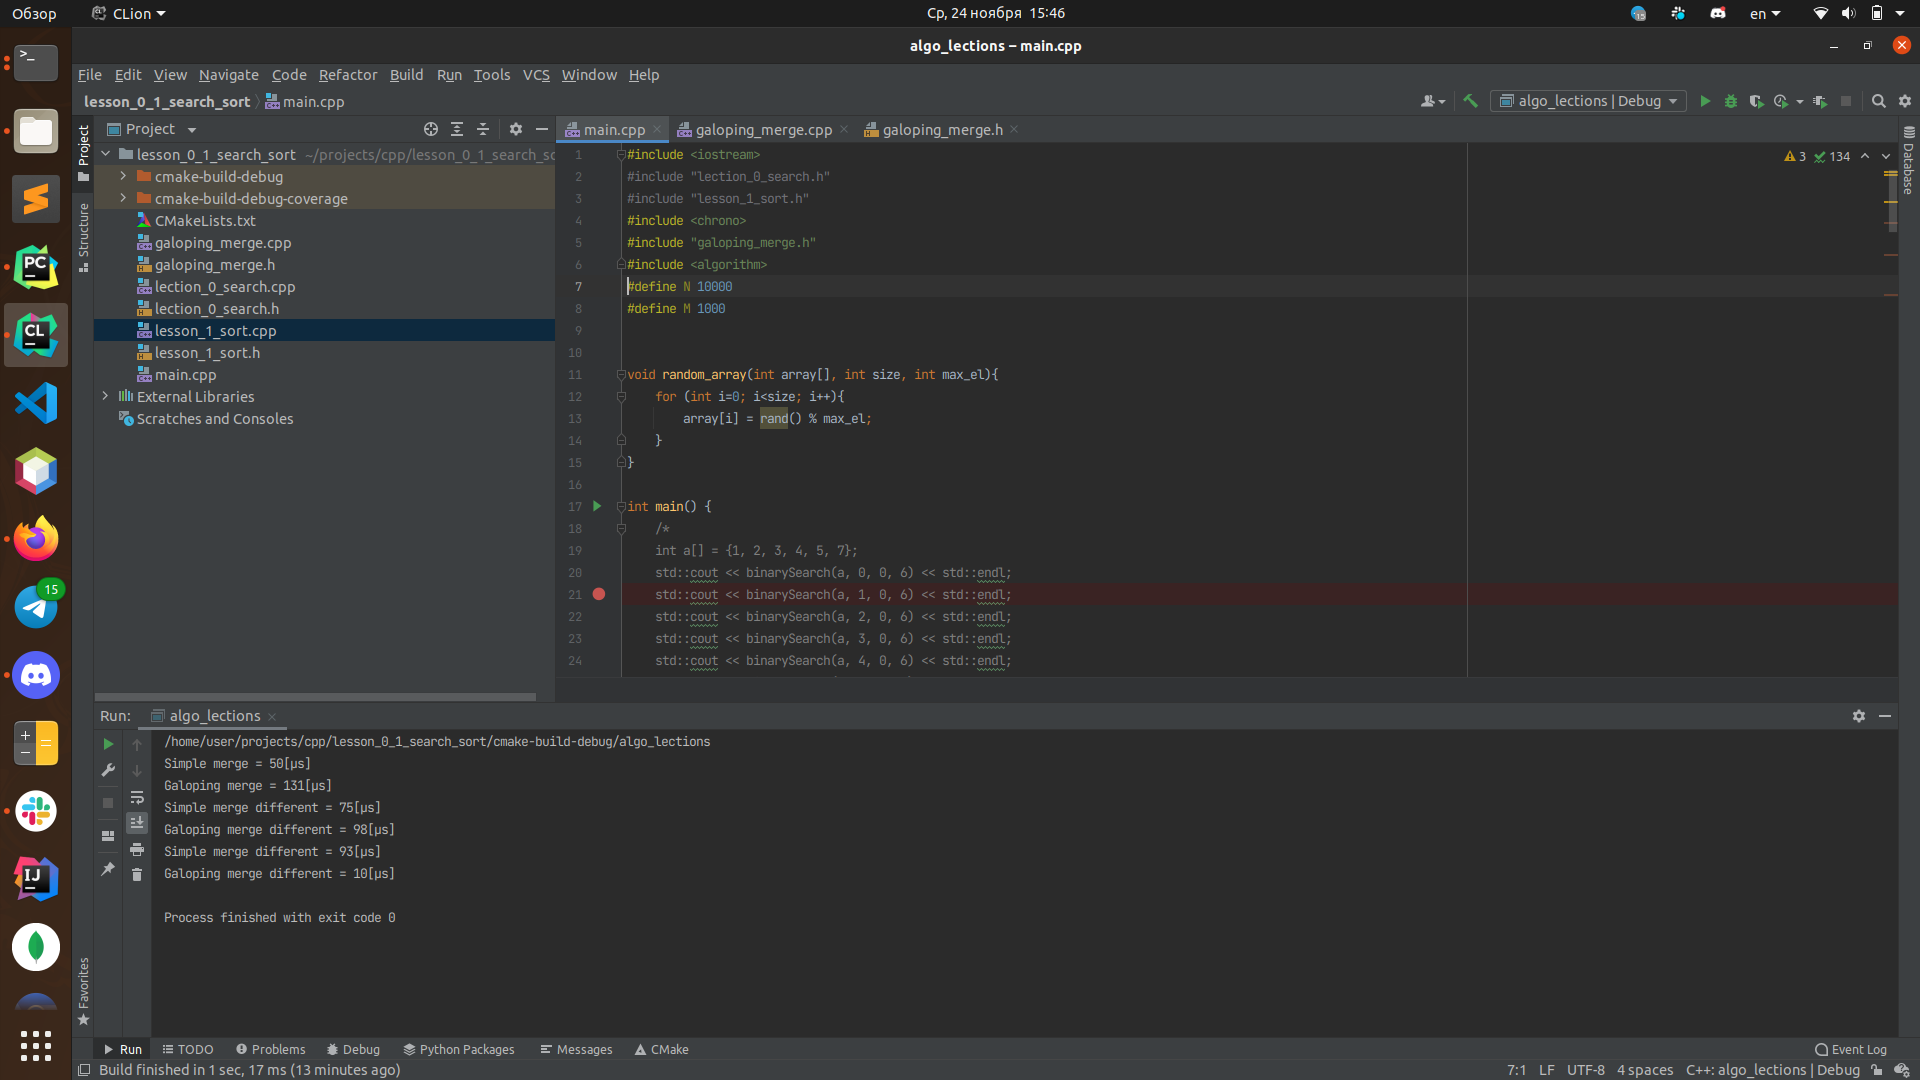

# Radix sort

In [ ]:
int _getMax(int a[], int size){
    int mx = a[0];
    for (int i = 1; i < size; i++)
        if (a[i] > mx)
            mx = a[i];
    return mx;
}

In [ ]:
void _countSort(int a[], int size, int exp)
{
    int result[size];
    int i, count[10] = { 0 };

    for (i = 0; i < size; i++)
        count[(a[i] / exp) % 10]++;

    for (i = 1; i < 10; i++)
        count[i] += count[i - 1];

    for (i = size - 1; i >= 0; i--) {
        int d = (a[i] / exp) % 10;
        result[--count[d]] = a[i];
    }

    for (i = 0; i < size; i++)
        a[i] = result[size - i - 1];
}

In [ ]:
void radixSort(int a[], int size){
    int m = _getMax(a, size);
    for (int exp = 1; m / exp > 0; exp *= 10)
        _countSort(a, size, exp);
}

# TimSort

https://github.com/timsort/cpp-TimSort

https://neerc.ifmo.ru/wiki/index.php?title=Timsort

# Кучи (heap)

понятие кучи

1) put(i)
2) getMax(i)

реализации:
1) массив 
2) отсортированный массив

свойство кучи

потомки:
* 2i + 1
* 2i + 2

предок (x - 1) / 2

просеивание вверх (вставка элемента)

In [ ]:
void siftUP(int a[], int item, int& size){
    a[size] = item;
    int i = size;
    while((i > 0) && (a[(i - 1) / 2] < a[i])) {
        swap(a[(i - 1) / 2], a[i]);
        i = (i - 1) / 2;
    }
}

просеивание вниз (удаление элемента)

In [ ]:
int siftDown(int a[], int item_idx, int& size){
    int res = a[item_idx];
    a[item_idx] = a[--size];
    int i = item_idx;
    while(true){
        int l = 2 * i + 1;
        int r = 2 * i + 2;
        int min_el = i;
        if ( (l < size + 1) && (a[l] > a[min_el]) ) min_el = l;
        if ( (r < size + 1) && (a[r] > a[min_el]) ) min_el = r;
        if (min_el == i) break;
        swap(a[i], a[min_el]);
        i = min_el;
    }
    return res;
}

превращение массива в кучу

In [ ]:
void _heapify(int a[], int size){
    for(int i = 0; i < size; i++){
        int size = i;
        siftUP(a, i, size);
    }
}

# Пирамидальная сортировка (heap sort)

In [ ]:
void heapSort(int a[], int size){
    _heapify(a, size);

    int n = size;
    for(int i=0; i<size; i++){
        int tmp = siftDown(a, 0, n);
        a[n] = tmp;
    }
}

# Результаты

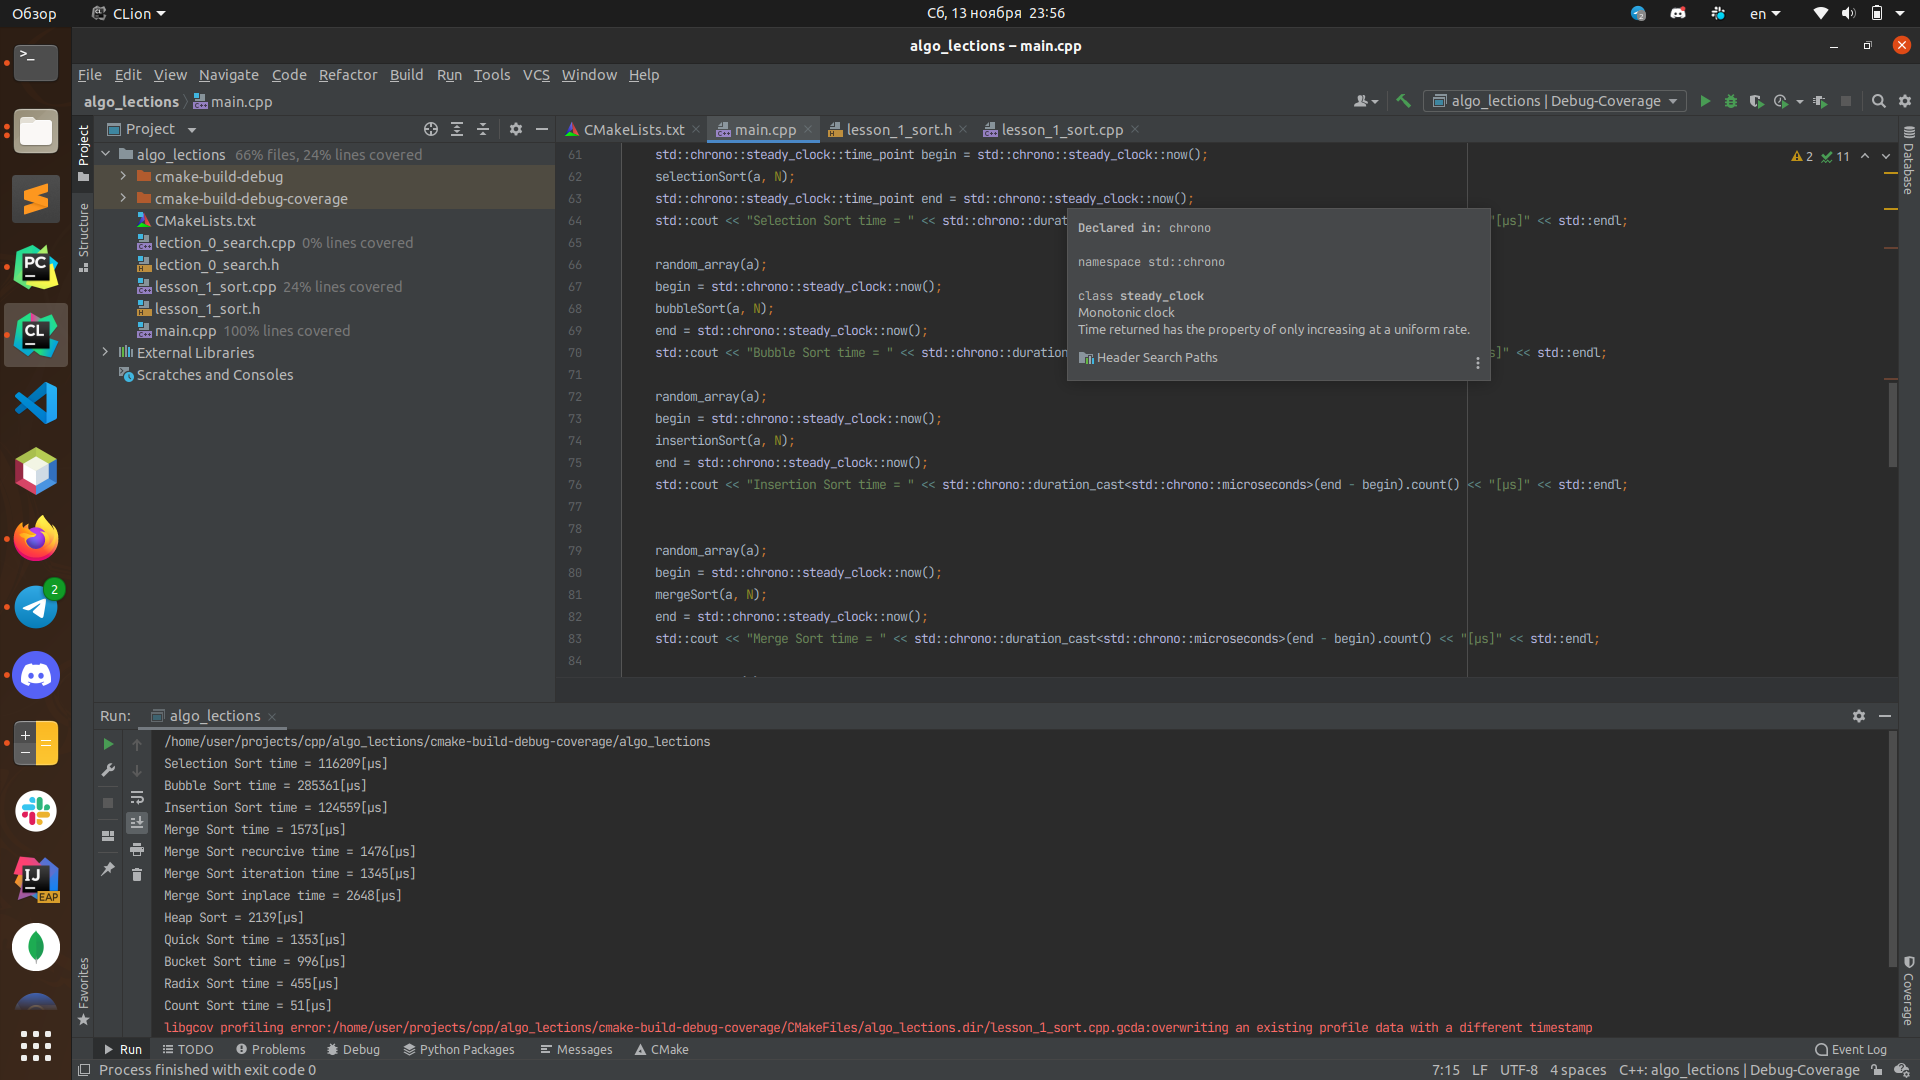

# K-я статистика

In [ ]:
int  _kpartition(int a[], int l, int r){
    int p_idx = rand() % (r - l), p = a[l + p_idx], k = l;
    for(int i = l; i < r; i++) {
        if (a[i] < p) swap(a[i], a[k++]);
    }
    return k;
}

In [ ]:
int kStatistic(int a[], int k, int l, int r){
    if (r - l == 1)  return a[l];
    if (r - l == 2) {
        if (a[l] > a[l + 1])
            swap(a[l], a[l + 1]);
        return a[k - 1];
    }

    int p = _kpartition(a, l, r);
    if(p >= k ) {
        if (p == r) p = l + (r - l) / 2;
        return kStatistic(a, k, l, p);
    }
    if(p < k ) {
        if (p == l) p = l + (r - l) / 2;
        return kStatistic(a, k, p, r);
    }
}

# Сортирующие сети

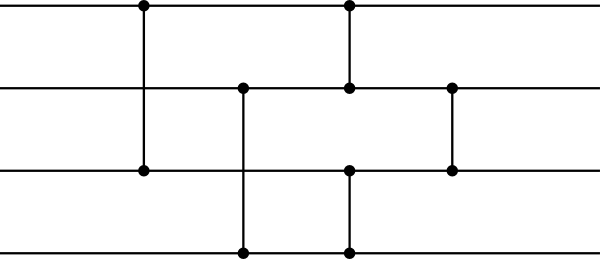

# BitonSort

аналог свапа

In [ ]:
void _bitonicSwap(int a[], int i, int j, int dir){
    if (dir==(a[i]>a[j]))
        swap(a[i],a[j]);
}

получение степени двойки меньшей числа

In [ ]:
int powerOfTwo(int x) {
    if ((x & (x - 1)) == 0)
        return x >> 1;
    x |= x >> 1;
    x |= x >> 2;
    x |= x >> 4;
    x |= x >> 8;
    x |= x >> 16;
    x |= x >> 32;
    return x - (x >> 1);
}

битоническое слияние

In [ ]:
void _bitonicMerge(int a[], int l, int r, int dir){
    if (r - l > 1)    {
        int k = powerOfTwo( r - l );
        for (int i = l; i < r - k; i++)
            _bitonicSwap(a, i, i + k, dir);
        _bitonicMerge(a, l, l + k, dir);
        _bitonicMerge(a, l + k, r, dir);
    }
}

битоническая сортировка

In [ ]:
void _bitonicSort(int a[], int l, int r, int dir){
    if (r - l > 1){
        int k = (r - l) / 2;
        _bitonicSort(a, l, l + k, !dir);
        _bitonicSort(a, l + k, r, dir);
        _bitonicMerge(a, l, r, dir);
    }
}

интерфейс

In [ ]:
void bitonicSort(int a[], int size){
    _bitonicSort(a, 0, size, 1);
}

# Сортировки за O(1)

применение хеширования

#  ДЗ

1) bitonicSort
2) посмотреть реализации и разобраться, особенно heap
3) улучшить / прооптимизировать quickSort
4) улучшить / прооптимизировать mergeSort